In [1]:
# Let's load the necessary packages and the data
import numpy as np
import pandas as pd
import pandas_profiling
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time
import pprint

In [6]:
# import data 
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv', error_bad_lines=False)
df.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [7]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [8]:
df.shape

(31984, 21)

In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,31984
Total Missing (%),5.0%
Total size in memory,5.1 MiB
Average record size in memory,168.0 B
Numeric,4
Categorical,14
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [13]:
# drop columns with many missing values and irrelevant data
df.drop(['ctz', 'state', 'bib', 'genderdiv'], axis=1)

,10k,name,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,116.37,28,5.37,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,70.23,4,3.23,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,107.47,5,4.97,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,67.83,3,3.10,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,112.27,20,5.27,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [16]:
# reorder the columns to make easier to read
df = df[['name', 'gender', 'age', 'city', 'country', 'overall', 'division', '5k', '10k', '20k', '25k', 'half', '30k', 
         '35k', '40k', 'official', 'pace']]
df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace
0,"Yamamoto, Hiroyuki",M,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27
1,"Jeptoo, Rita",F,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30
2,"Van Dyk, Ernst F.",M,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08
3,"Dibaba, Mare",F,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37
4,"Hokinoue, Kota",M,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10


In [25]:
# counts
df['country'].value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
FIN       28
ISL       28
BEL       27
SIN       23
AUT       22
NOR       21
VEN       19
RSA       19
TPE       18
       ...  
MAS        4
CZE        4
LUX        4
SVK        4
HUN        3
ECU        3
DOM        3
UKR        3
PAN        3
ESA        2
QAT        2
ROU        2
THA        2
BAH        2
EGY        2
VGB        1
CRO        1
EST        1
TRI        1
BRN        1
CAY        1
MAR        1
BAR        1
INA        1
BOL        1
ZIM        1
URU        1
LIE        1
BLR        1
TAN        1
Name: country, Length: 78, dtype: int64

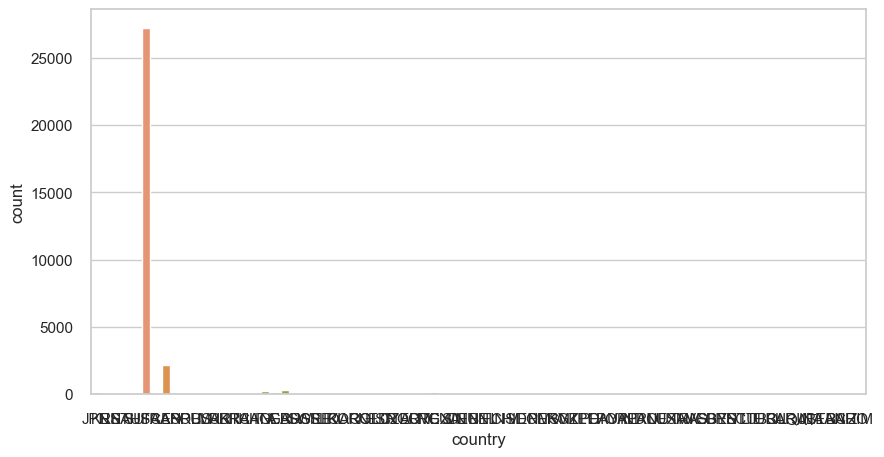

In [24]:
# Let's do some exploratory data analysis
plt.subplots(figsize=(10, 5))
sns.set(style='whitegrid')
sns.countplot(x=df['country'], data=df)
plt.show()